In [1]:
import os
import platform

#########################################################################################################################################################
# PARAMETROS DEFINIDOS EN FUNCION DEL USUARIO
#########################################################################################################################################################

# Ruta relativa hacia la librería ai4eutils
ai4eutils_relative = "./repos/ai4eutils"

# Ruta relativa hacia la librería CameraTraps
CameraTraps_relative = "./repos/CameraTraps"

# Ruta relativa hacia carpeta de JSON con los datos de entrada
output_json_path_relative = './output_json'

# Ruta relativa hacia la carpeta destino de los ficheros JSON:
output_mask_path_relative = ('./output_mask')

VISUALIZAR_RESULTADOS = False


#########################################################################################################################################################
#########################################################################################################################################################

home = os.path.expanduser("~")

ai4utils = os.path.abspath(ai4eutils_relative)
CameraTraps = os.path.abspath(CameraTraps_relative)
output_json = os.path.abspath(output_json_path_relative)
output_mask = os.path.abspath(output_mask_path_relative)

try:
    os.environ['PYTHONPATH']
except KeyError:
    os.environ['PYTHONPATH'] = ""
if platform.system() == 'Windows':
    os.environ['PYTHONPATH'] += (";" + ai4utils)
    os.environ['PYTHONPATH'] += (";" + CameraTraps)
else:
    os.environ['PYTHONPATH'] += (":" + ai4utils)
    os.environ['PYTHONPATH'] += (":" + CameraTraps)

print('=======================================================================================================================================')
print('PYTHONPATH: ' + os.environ['PYTHONPATH'])
print('ai4eutils PATH: ' + '\t' + ai4utils)
print('CameraTraps PATH: ' + '\t' + CameraTraps)
print('output_json PATH: ' + '\t' + output_json)
print('output_mask PATH: ' + '\t' + output_mask)
print('=======================================================================================================================================')

PYTHONPATH: /home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles:/home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles/lib/python:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
ai4eutils PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils
CameraTraps PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
output_json PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_json
output_mask PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask


In [2]:
!python ./modules/genera_mascaras.py --input_dir "$output_json" --output_dir "$output_mask"

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 109.97it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/9_mask.png


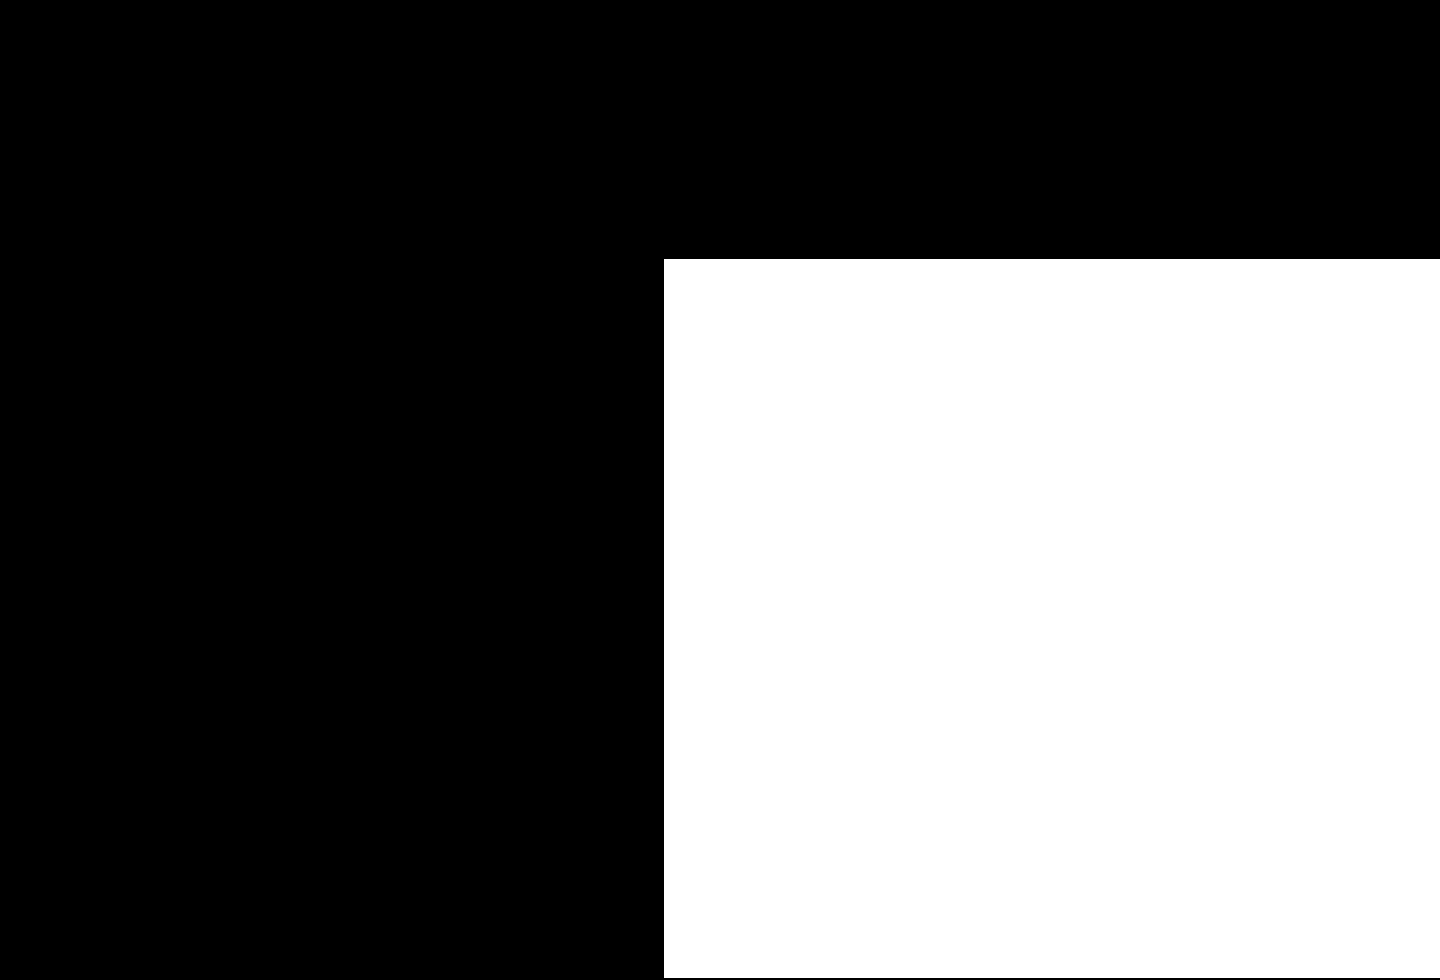


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/3_mask.png


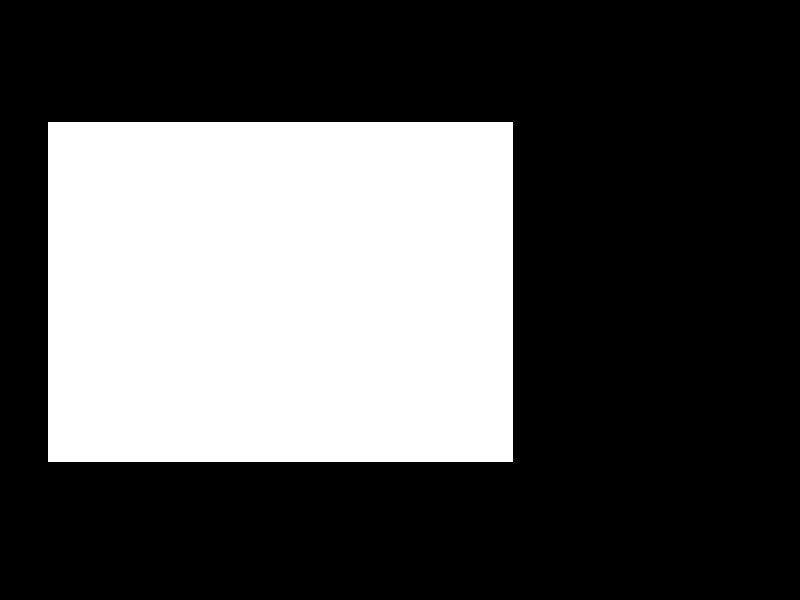


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/10_mask.png


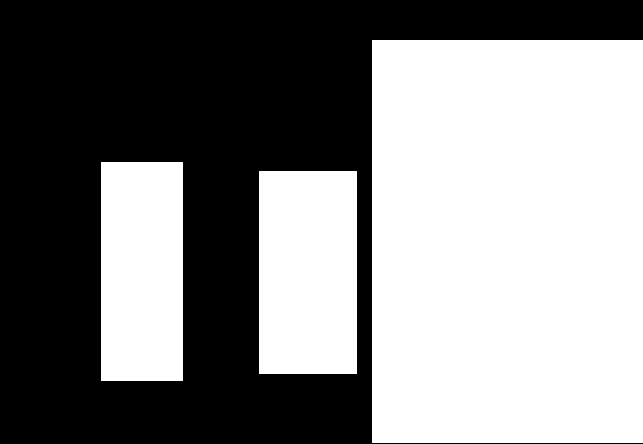


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/7_mask.png


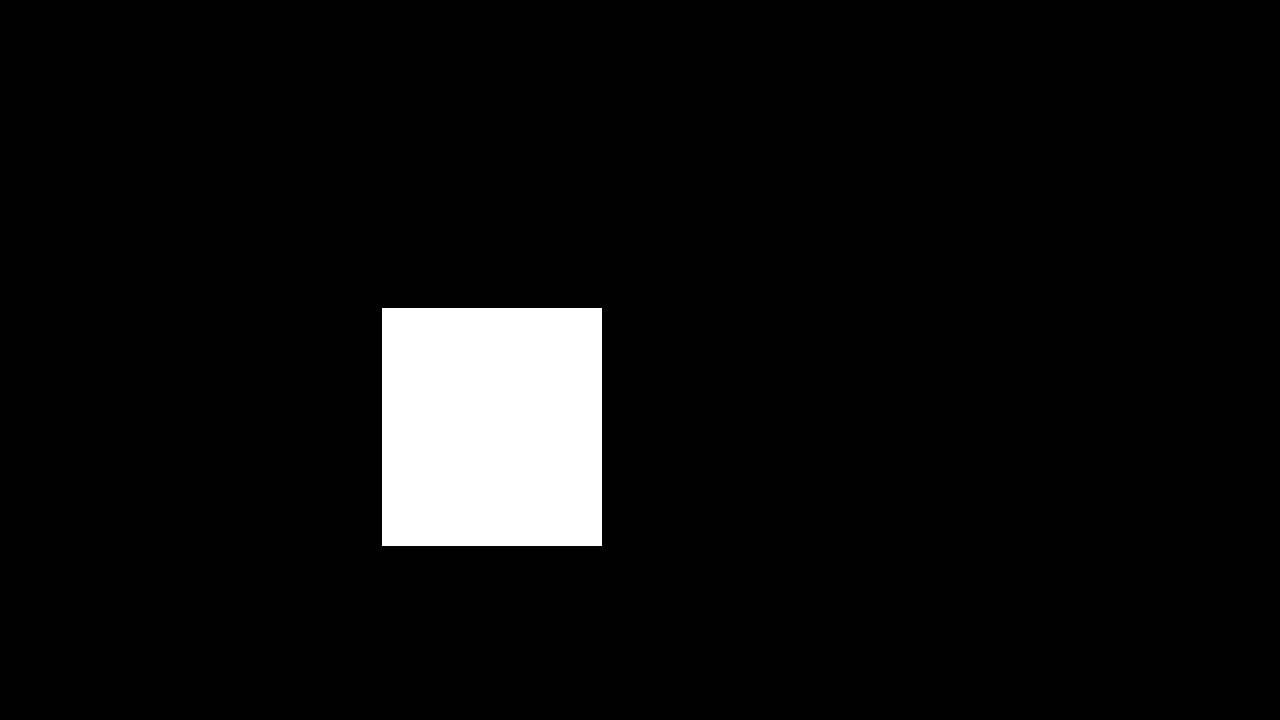


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/8_mask.png


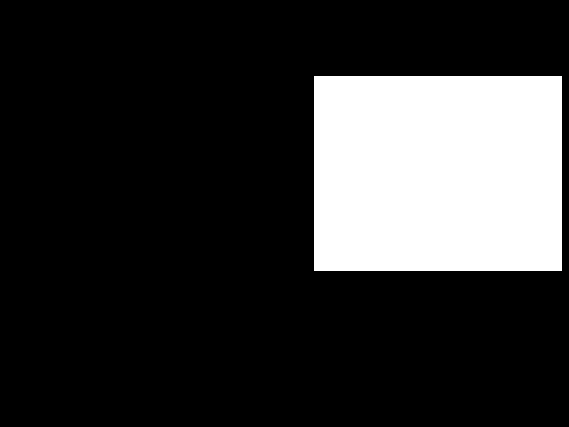


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/1_mask.png


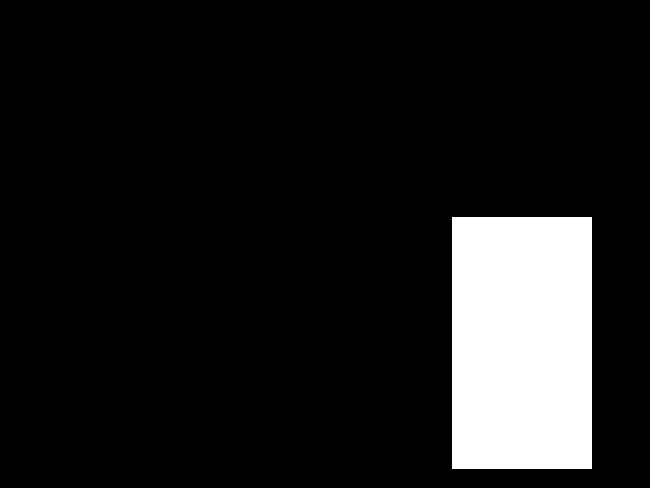


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/4_mask.png


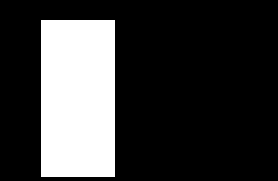


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/5_mask.png


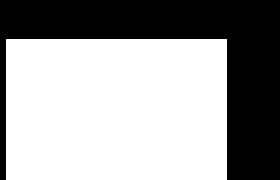


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/2_mask.png


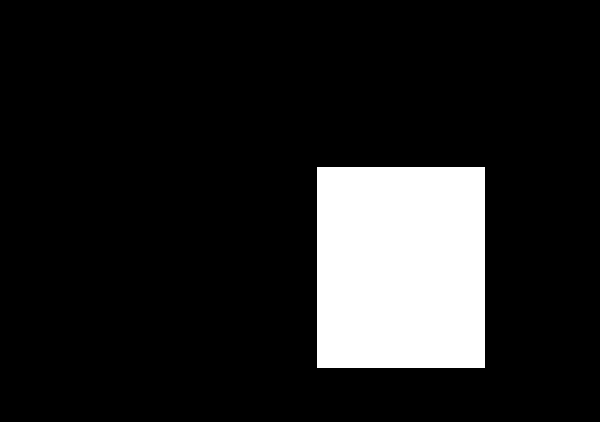


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_mask/6_mask.png


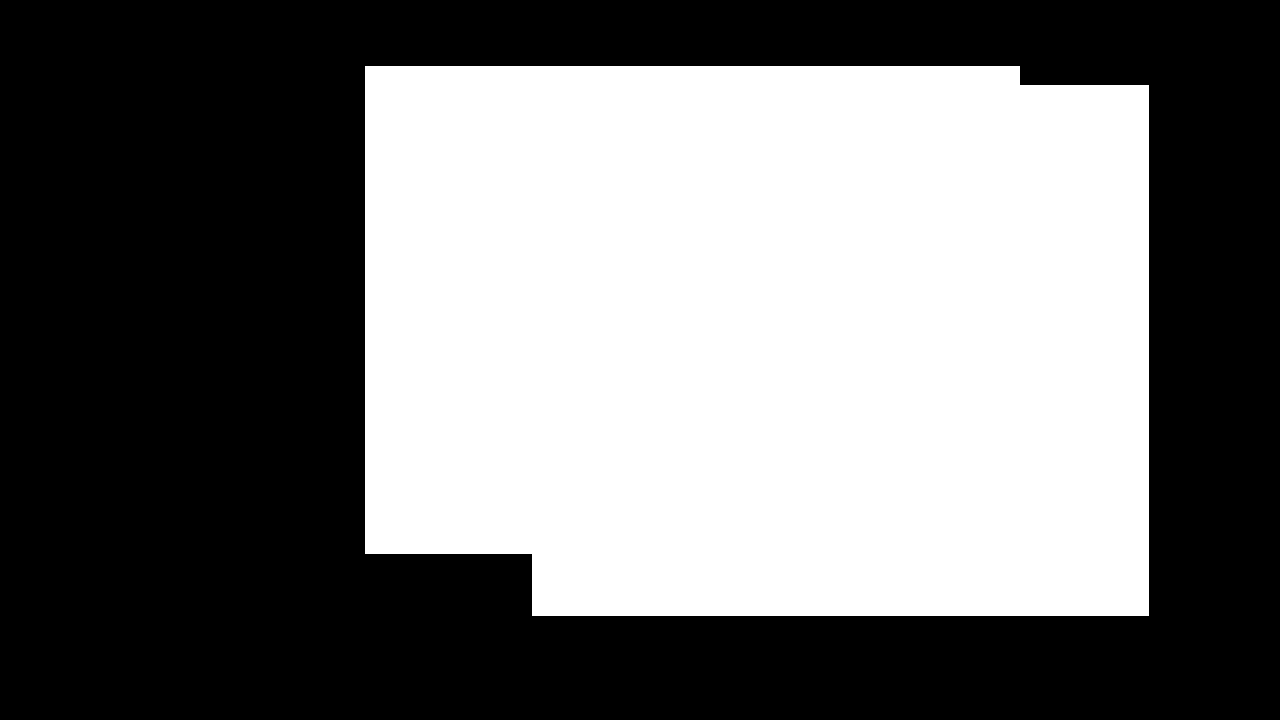

100%|██████████| 10/10 [00:00<00:00, 114.46it/s]

In [3]:
if VISUALIZAR_RESULTADOS:
    import os
    import glob
    from PIL import Image
    from tqdm import tqdm

    image_extensions = ['.png']

    def is_image_file(s):
        """
        Compara la extesión de un archivo con las extensiones admitadas en 
        image_extensions.
        """
        ext = os.path.splitext(s)[1]
        return ext.lower() in image_extensions

    def find_image_files(strings):
        """
        Devuelve una lista de nombres candidatos a ser ficheros de imágenes. Para los 
        nombres busca a partir de las extensiones incluidas en image_extension.
        """
        return [s for s in strings if is_image_file(s)]

    def find_images(dir_name):
        """
        Busca todos los ficheros que parecen imagénes dentro de un directorio.
        """
        strings = glob.glob(os.path.join(dir_name, '*.*'))

        image_strings = find_image_files(strings)

        return image_strings

    image_file_names = find_images(output_mask)

    for image_file in tqdm(image_file_names):
        print(image_file)
        im = Image.open(image_file)
        display(im)
        print('')